## EN3160 Assignment 01
#### Intensity Transformations and Neighborhood Filtering

In [2]:
# Import the required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

##### Question 01

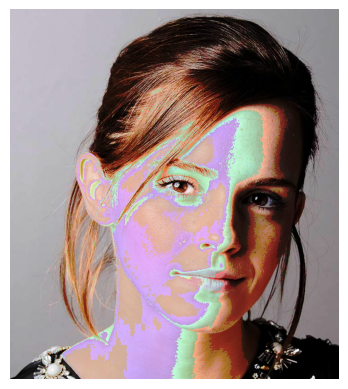

In [3]:
# Load the required image in grayscale
img = cv2.imread("a1images/emma.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

x = np.arange(256, dtype=np.uint8)
x[50:151] = 100 + ((255 - 100) / 100) * (x[50:151] - 50)

img = x[img]

plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


##### Question 02

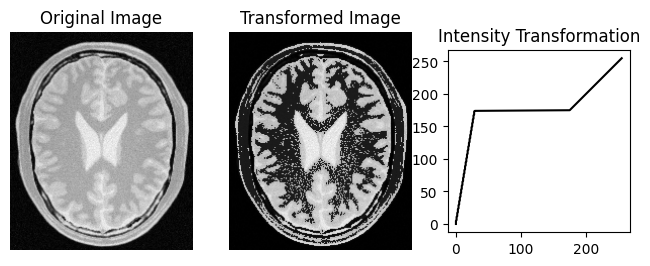

In [4]:
img = cv2.imread("a1images/brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)

T = np.arange(256, dtype=np.uint8)
T[0:175] //= 6
# T[175:256] = 200

t_img = T[img]

fig, ax = plt.subplots(1, 3, figsize=(8, 5))
for i in range(2):
    ax[i].axis('off')

ax[0].set_title("Original Image")
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)

ax[1].set_title("Transformed Image")
ax[1].imshow(t_img, cmap='gray', vmin=0, vmax=255)

ax[2].plot(T, np.arange(256), color='black')
ax[2].set_aspect('equal')
ax[2].set_title("Intensity Transformation")

plt.show()

##### Question 03

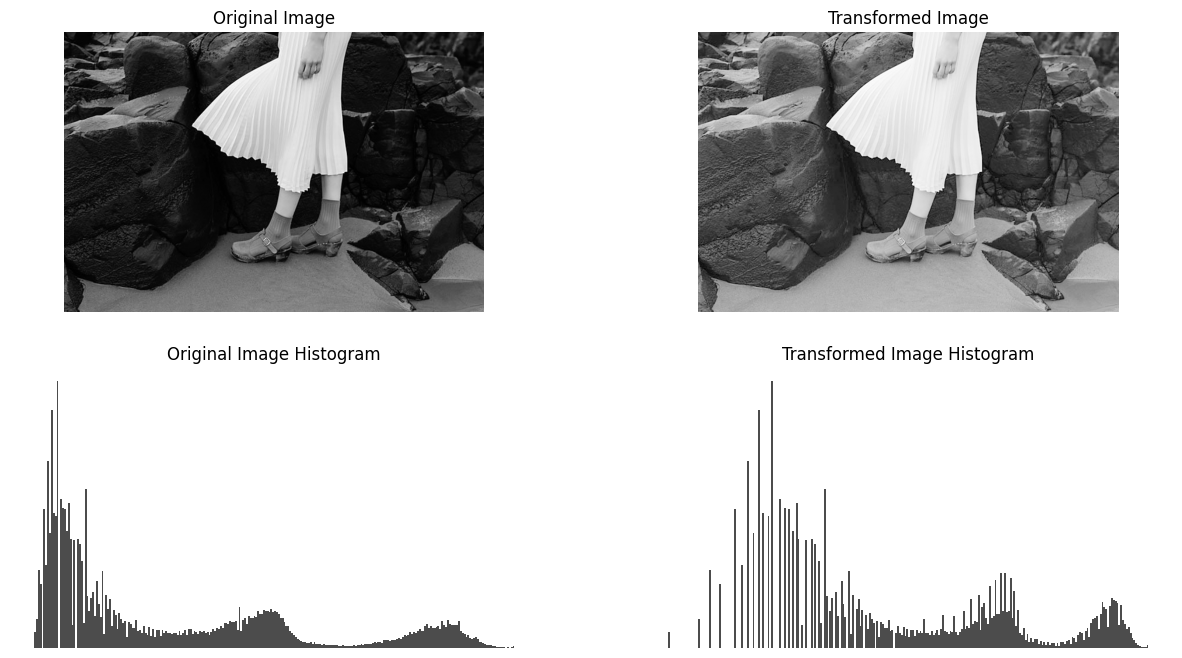

In [5]:
# Open the required image and convert the color space to LAB
img = cv2.imread("a1images/highlights_and_shadows.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Extract the L plane
img_l = img[:, :, 0]

# Set the value of gamma for the transformation
gamma = 0.5

# Construct a vector representing the intensity transformation
T = np.arange(0, 256, dtype=np.uint8) / 255.0
T = (T ** gamma) * 255

# Apply the transformation to the L plane
img_t = T[img_l]

# Set up the plot and display the images
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for a in ax.flatten():
    a.axis('off')

ax[0][0].set_title("Original Image")
ax[0][0].imshow(img_l, cmap='gray')

ax[0][1].set_title("Transformed Image")
ax[0][1].imshow(img_t, cmap='gray')

ax[1][0].set_title("Original Image Histogram")
ax[1][0].hist(img_l.ravel(), bins=256, color='black', alpha=0.7)

ax[1][1].set_title("Transformed Image Histogram")
ax[1][1].hist(img_t.ravel(), bins=256, color='black', alpha=0.7)

plt.show()

##### Question 04

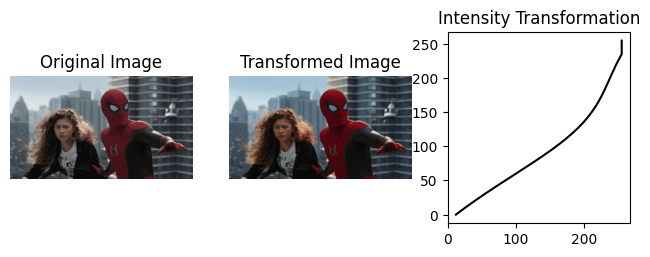

In [6]:
img = cv2.imread("a1images/spider.png")

# Split the image into H, S, V channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H = img[:, :, 0]
S = img[:, :, 1]
V = img[:, :, 2]

a = 0.5
sigma = 70

T = np.arange(256, dtype=np.float32)
T = np.minimum(np.ones(256) * 255, T + a * 128 * np.exp(-((T - 128) ** 2) / (2 * sigma ** 2)))

S_new = T[S]

img_t = img.copy()
img_t[:, :, 1] = S_new
img_t = cv2.cvtColor(img_t, cv2.COLOR_HSV2RGB)

fig, ax = plt.subplots(1, 3, figsize=(8, 5))
for i in range(2):
    ax[i].axis('off')   

ax[0].set_title("Original Image")
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB))

ax[1].set_title("Transformed Image")
ax[1].imshow(img_t)

ax[2].plot(T, np.arange(256), color='black')
ax[2].set_aspect('equal')
ax[2].set_title("Intensity Transformation")

plt.show()

##### Question 05

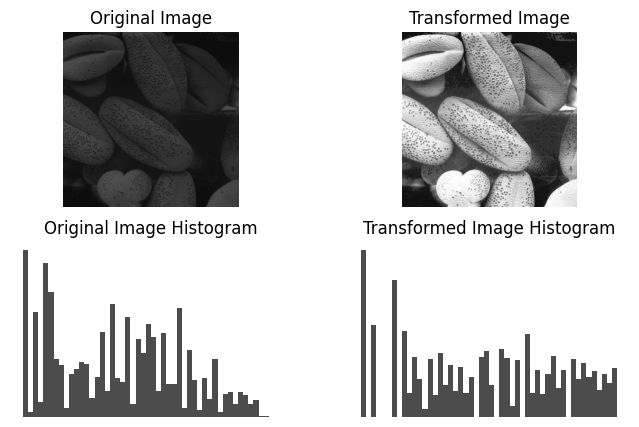

In [ ]:
img = cv2.imread("a1images/shells.tif", cv2.IMREAD_GRAYSCALE)

pixel_values, counts = np.unique(img, return_counts=True)
cumulative_counts = np.cumsum(counts)

T = np.arange(256, dtype=np.uint8)

for i in range(len(pixel_values)):
    pixel_value = pixel_values[i]
    T[pixel_value] = np.round((cumulative_counts[i] / cumulative_counts[-1]) * 255)

t_img = T[img]

fig, ax = plt.subplots(2, 2, figsize=(8, 5))
for a in ax.flatten():
    a.axis('off')

ax[0][0].set_title("Original Image")
ax[0][0].imshow(img, cmap='gray', vmin=0, vmax=255)

ax[0][1].set_title("Transformed Image")
ax[0][1].imshow(t_img, cmap='gray', vmin=0, vmax=255)

ax[1][0].set_title("Original Image Histogram")
ax[1][0].hist(img.ravel(), bins=256, color='black', alpha=0.7)

ax[1][1].set_title("Transformed Image Histogram")
ax[1][1].hist(t_img.ravel(), bins=256, color='black', alpha=0.7)

plt.show()